In [2]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import datetime

In [4]:
start_time = datetime.datetime(2025, 1, 1).timestamp()
end_time = datetime.datetime(2025, 8, 29).timestamp()
r = requests.get('http://localhost/api/v1/stock?from={}&to={}&resolution=1D&symbol=FPT'.format(int(start_time), int(end_time)))
x = r.json()
df = pd.DataFrame(x)
df.head()

,t,o,h,l,c,v,symbol,s
0,1735776000,131.61,131.79,129.54,131.18,3172800,FPT,ok
1,1735862400,130.58,130.58,128.59,128.59,4336100,FPT,ok
2,1736121600,128.68,129.63,128.07,128.86,3467100,FPT,ok
3,1736208000,129.02,130.58,129.02,129.54,3449700,FPT,ok
4,1736294400,129.46,129.46,127.82,127.99,3879900,FPT,ok


In [5]:
# Basic analytics for stock price from the dataset

# Convert timestamp to datetime for better readability
df['date'] = pd.to_datetime(df['t'], unit='s')

# Calculate analytics
analytics = {
    'Date Range': (df['date'].min(), df['date'].max()),
    'Open Price': {'min': df['o'].min(), 'max': df['o'].max(), 'mean': df['o'].mean()},
    'High Price': {'min': df['h'].min(), 'max': df['h'].max(), 'mean': df['h'].mean()},
    'Low Price': {'min': df['l'].min(), 'max': df['l'].max(), 'mean': df['l'].mean()},
    'Close Price': {'min': df['c'].min(), 'max': df['c'].max(), 'mean': df['c'].mean()},
    'Volume': {'min': df['v'].min(), 'max': df['v'].max(), 'mean': df['v'].mean()},
}

for key, value in analytics.items():
    print(f"{key}: {value}")

Date Range: (Timestamp('2025-01-02 00:00:00'), Timestamp('2025-08-19 00:00:00'))
Open Price: {'min': np.float64(84.41), 'max': np.float64(133.0), 'mean': np.float64(109.87754838709675)}
High Price: {'min': np.float64(92.34), 'max': np.float64(134.63), 'mean': np.float64(110.9707741935484)}
Low Price: {'min': np.float64(84.41), 'max': np.float64(132.39), 'mean': np.float64(108.62316129032256)}
Close Price: {'min': np.float64(90.71), 'max': np.float64(133.17), 'mean': np.float64(109.69509677419353)}
Volume: {'min': np.int64(1005400), 'max': np.int64(21845500), 'mean': np.float64(6722056.129032258)}


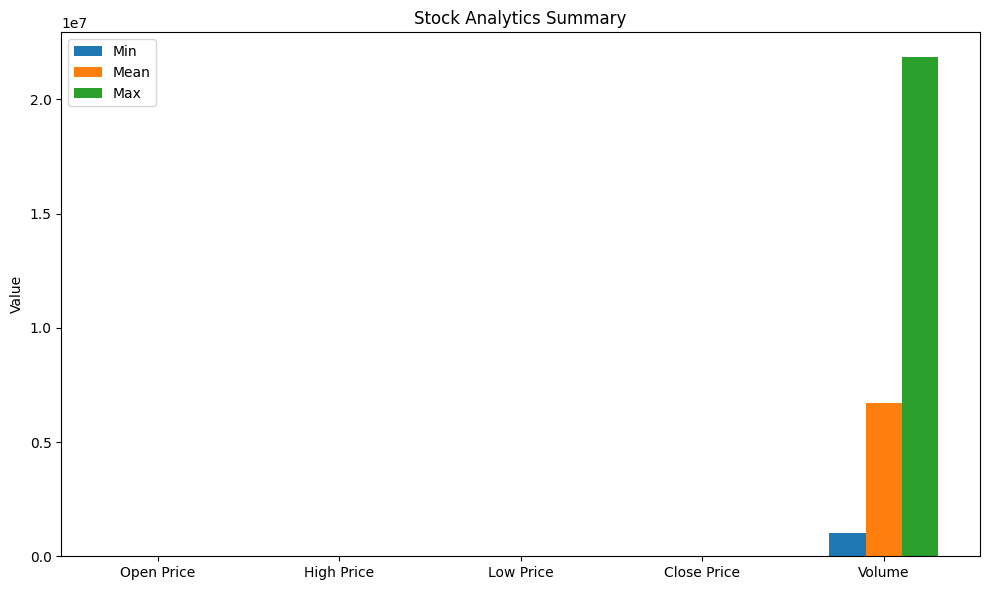

In [6]:
import numpy as np

# Visualize analytics summary as bar plots

# Prepare data for plotting

metrics = ['Open Price', 'High Price', 'Low Price', 'Close Price', 'Volume']
stat_names = ['min', 'mean', 'max']

data = {stat: [analytics[m][stat] for m in metrics] for stat in stat_names}

x = np.arange(len(metrics))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, data['min'], width, label='Min')
rects2 = ax.bar(x, data['mean'], width, label='Mean')
rects3 = ax.bar(x + width, data['max'], width, label='Max')

ax.set_ylabel('Value')
ax.set_title('Stock Analytics Summary')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
plt.tight_layout()
plt.show()